# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [1]:
import os
from utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm

Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [2]:
CSV_PATH = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\query_final_results_20231026023937.csv'

Carga el Dataset.

In [3]:
print("Counting length of csv file")
with open(CSV_PATH, 'r', encoding='utf-8') as file:
    total_lines = sum(1 for _ in file)
print(f"{total_lines} rows will be loaded to create the recommendation system")


Counting length of csv file
34761793 rows will be loaded to create the recommendation system


In [4]:
#total_lines = 100000
# Create an empty list to store the DataFrames from chunks
dfs = [] 
# Create a tqdm wrapper for pd.read_csv
with tqdm(total=total_lines, desc = 'Loading Dataset') as pbar:
    def update_progress(n):
        pbar.update(n)
    
    # Read the CSV file using pd.read_csv and provide the progress callback
    df_chunks = pd.read_csv(CSV_PATH, chunksize=100000, iterator=True, encoding='utf-8', nrows=total_lines)  # Specify the encoding
    for chunk in df_chunks:
        # Process each chunk if needed
        # You can access the chunk data in the 'chunk' DataFrame
        #chunk['first_two_digits_code'] = chunk['agilebuyingscode'].apply(lambda x: x[:2])
        chunk['feature_vector'] = chunk['agilebuyingscode'].apply(lambda x: x[:2]) + ' ' + chunk['agileoffereditemsdescripcionofertada']
        chunk['feature_vector'] = chunk['feature_vector'].apply(lambda x: unidecode(str(x)).lower())
        dfs.append(chunk)
        update_progress(chunk.shape[0])
        
df = pd.concat(dfs, ignore_index=True)

Loading Dataset:  44%|████▍     | 15301056/34761793 [03:29<04:26, 73029.20it/s]


Lanzar el recomendador. Si no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
Models and Dataframes not found, initializing a Recommender System from zero.
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.


Selecting strings from each user: 100%|██████████| 1846/1846 [06:29<00:00,  4.74it/s]
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


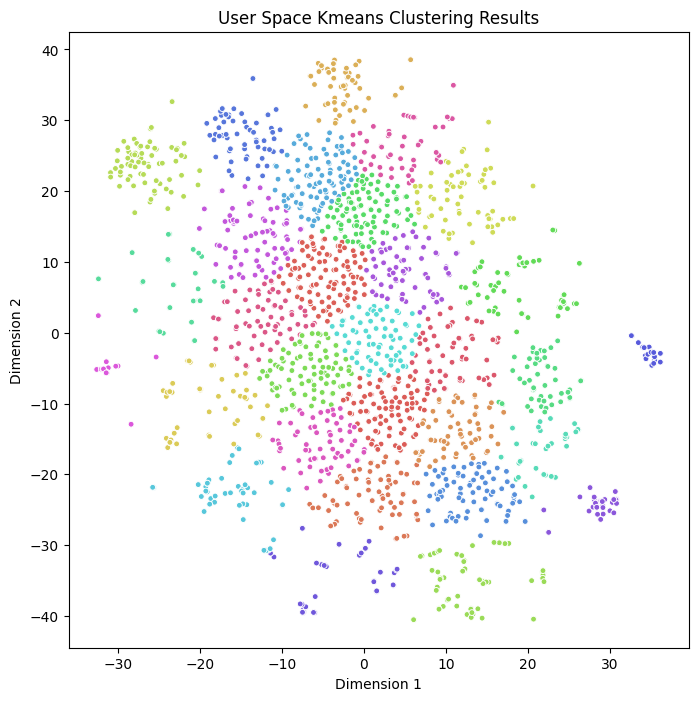

Exporting Kmeans model
Exporting vectorizer model
Done


In [5]:
RS = RecommenderSystem(df,save_path=  os.getcwd())

### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [18]:
n_cluster,gg = RS.predict('77.187.331-6') 


Unseen data point belongs to cluster 28


Agregando un poco de post-procesamiento se pueden encontrar visualizaciones de interés.

In [19]:
gg.query(f"Cluster == {n_cluster}")

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,feature_vector_x,feature_vector_y,Cluster
500,65.075.485-9,777304-1765-COT23,PARA MEJOR EVALUACION DEL PRODUCTO FAVOR ADJUN...,OC Emitida,$,1800000.0,Articuladores dentales o accesorios,42152701,Equipamiento y suministros médicos / Equipos y...,Articuladores dentales o accesorios,Equipamiento y suministros médicos / Equipos y...,"Productos disponibles, se adjunta ficha de mas...",3698.0,76.452.510-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,"77 productos disponibles, se adjunta ficha de ...","77 productos disponibles, se adjunta ficha de ...",28.0
501,65.075.485-9,777304-1765-COT23,PARA MEJOR EVALUACION DEL PRODUCTO FAVOR ADJUN...,OC Emitida,$,1800000.0,Articuladores dentales o accesorios,42152701,Equipamiento y suministros médicos / Equipos y...,Articuladores dentales o accesorios,Equipamiento y suministros médicos / Equipos y...,"Productos disponibles, se adjunta ficha de mas...",3698.0,76.452.510-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,"77 productos disponibles, se adjunta ficha de ...","77 productos disponibles, se adjunta ficha de ...",28.0
502,65.075.485-9,777304-1765-COT23,PARA MEJOR EVALUACION DEL PRODUCTO FAVOR ADJUN...,OC Emitida,$,1800000.0,Articuladores dentales o accesorios,42152701,Equipamiento y suministros médicos / Equipos y...,Articuladores dentales o accesorios,Equipamiento y suministros médicos / Equipos y...,"Productos disponibles, se adjunta ficha de mas...",3698.0,76.452.510-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,"77 productos disponibles, se adjunta ficha de ...","77 productos disponibles, se adjunta ficha de ...",28.0
503,65.075.485-9,777304-1765-COT23,PARA MEJOR EVALUACION DEL PRODUCTO FAVOR ADJUN...,OC Emitida,$,1800000.0,Articuladores dentales o accesorios,42152701,Equipamiento y suministros médicos / Equipos y...,Articuladores dentales o accesorios,Equipamiento y suministros médicos / Equipos y...,"Productos disponibles, se adjunta ficha de mas...",3698.0,76.452.510-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,"77 productos disponibles, se adjunta ficha de ...","77 productos disponibles, se adjunta ficha de ...",28.0
504,65.075.485-9,777304-1765-COT23,PARA MEJOR EVALUACION DEL PRODUCTO FAVOR ADJUN...,OC Emitida,$,1800000.0,Articuladores dentales o accesorios,42152701,Equipamiento y suministros médicos / Equipos y...,Articuladores dentales o accesorios,Equipamiento y suministros médicos / Equipos y...,"Productos disponibles, se adjunta ficha de mas...",3698.0,76.452.510-8,VENTAS AL POR MENOR DE OTROS PRODUCTOS EN ALMA...,False,"77 productos disponibles, se adjunta ficha de ...","77 productos disponibles, se adjunta ficha de ...",28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299963,61.606.602-1,608-2105-COT23,"TET C/BALON 4.0FR, TET C/BALON 4.5FR, TET C/BA...",OC Emitida,CLP,1800000.0,Sets endotraqueales o de traqueotomía,42271910,Equipamiento y suministros médicos / Productos...,Sets endotraqueales o de traqueotomía,Equipamiento y suministros médicos / Productos...,"Se adjunta ficha técnica, precio incluye despa...",17280.0,99.593.170-2,VENTA AL POR MAYOR DE MATERIAS PRIMAS AGRICOLA...,False,"60 se adjunta ficha tecnica, precio incluye de...","10 tubo endotraqueal desechable 7.0 mm, segun ...",28.0
15299964,61.606.602-1,608-2105-COT23,"TET C/BALON 4.0FR, TET C/BALON 4.5FR, TET C/BA...",OC Emitida,CLP,1800000.0,Sets endotraqueales o de traqueotomía,42271910,Equipamiento y suministros médicos / Productos...,Sets endotraqueales o de traqueotomía,Equipamiento y suministros médicos / Productos...,"Se adjunta ficha técnica, precio incluye d

In [28]:
display(gg.query(f"Cluster == {n_cluster}").groupby(by =['taxnumberprovider','agilebuyingscode','agilebuyingsdescription','agileitemsproductcategory']).count())

organismosolicitante  \
taxnumberprovider agilebuyingscode  agilebuyingsdescription                            agileitemsproductcategory                                                  
10.953.742-k      1057512-205-COT23 su oferta debe incluir fotografía o ficha del p... Equipos, suministros y accesorios deportivos y ...                    96   
                  1237853-8-COT23   Balones de Fútbol para talleres Corporación del... Equipos, suministros y accesorios deportivos y ...                    32   
                  1255790-34-COT23  Se requieren adquirir dos unidades de aros de b... Equipos, suministros y accesorios deportivos y ...                    32   
                  2279-56-COT23     S/P 104  BALONES                                   Equipos, suministros y accesorios deportivos y ...                   192   
                  2281-691-COT23    Se requiere una cotización para 150 poleras muj... Ropa, maletas y productos de aseo personal / Ro...                    64   
...                                                                                                                                                         ...   
99.593.170-2      937232-113-COT23  SOLICITAMOS INSUMOS MEDICOS DE FORMA URGENTE PA... Equipamiento y suministros médicos / Suministro...                    64   
                  974556-16-COT23   Insumos Médicos, para el requerimiento de la EMB.  Equipamiento y suministros médicos / Productos ...                    64   
                                                                                       Equipamiento y suministros médicos / Vestuario ...                    96   
                  974556-4-COT23    Insumos químicos para empleo en atenciones de u... Equipamiento y suministros médicos / Equipos y ...                    32   
                                                                                       Equipamiento y suministros médicos / Productos ...                    32   

                                                                                                                                           agilebuyingsstatus  \
taxnumberprovider agilebuyingscode  agilebuyingsdescription                            agileitemsproductcategory                                                
10.953.742-k      1057512-205-COT23 su oferta debe incluir fotografía o ficha del p... Equipos, suministros y accesorios deportivos y ...                  96   
                  1237853-8-COT23   Balones de Fútbol para talleres Corporación del... Equipos, suministros y accesorios deportivos y ...                  32   
                  1255790-34-COT23  Se requieren adquirir dos unidades de aros de b... Equipos, suministros y accesorios deportivos y ...                  32   
                  2279-56-COT23     S/P 104  BALONES                                   Equipos, suministros y accesorios deportivos y ...                 192   
                  2281-691-COT23    Se requiere una cotización para 150 poleras muj... Ropa, maletas y productos de aseo personal / Ro...                  64   
...                                                                                                                                                       ...   
99.593.170-2      937232-113-COT23  SOLICITAMOS INSUMOS MEDICOS DE FORMA URGENTE PA... Equipamiento y suministros médicos / Suministro...                  64   
                  974556-16-COT23   Insumos Médicos, para el requerimiento de la EMB.  Equipamiento y suministros médicos / Productos ...                  64   
                                                                                       Equipamiento y suministros médicos / Vestuario ...                  96   
                  974556-4-COT23    Insumos químicos para empleo en atenciones de u... Equipamiento y suministros médicos / Equipos y ...                  32   
                                                                                       